In [1]:
import pandas as pd
import glob
import os


In [51]:
directory_path = 'Data_clean/Alta_sensors/'

excel_files = glob.glob(os.path.join(directory_path, '*.xlsx'))

data_frames = [pd.read_excel(file) for file in excel_files]
combined_data = pd.concat(data_frames, ignore_index=True)
print(combined_data.head())
print(combined_data.columns)


                 Date  Count
0 2024-05-01 08:02:30    0.0
1 2024-05-01 08:17:31    0.0
2 2024-05-01 08:21:30    2.0
3 2024-05-01 08:26:29    0.0
4 2024-05-01 08:31:29    0.0
Index(['Date', 'Count'], dtype='object')


<AxesSubplot:title={'center':'Number of People Over Time'}, xlabel='Time', ylabel='Number of People'>

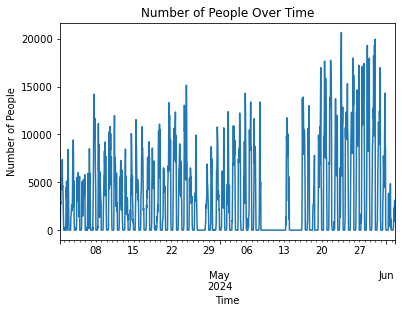

In [13]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

combined_data.isnull().sum()

combined_data = combined_data.dropna()

combined_data.set_index('Date', inplace=True)

people_count = combined_data['Count'].resample('H').sum()

people_count.plot(title='Number of People Over Time', xlabel='Time', ylabel='Number of People')


Found Excel files: ['Data_clean/Alta_sensors/2.P04_processed.xlsx', 'Data_clean/Alta_sensors/2P.04_processed.xlsx', 'Data_clean/Alta_sensors/2P.02_processed.xlsx', 'Data_clean/Alta_sensors/2.P03_processed.xlsx', 'Data_clean/Alta_sensors/2.P01_processed.xlsx', 'Data_clean/Alta_sensors/2P.03_processed.xlsx', 'Data_clean/Alta_sensors/2.P02_processed.xlsx', 'Data_clean/Alta_sensors/2P.01_processed.xlsx']
Column names: Index(['Date', 'Count'], dtype='object')
Missing values in 'Count' column before handling: 631
Missing values in 'Count' column after handling: 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
 [[ 14.6764214    3.17558528  81.89882943]
 [ 16.50617284   2.82716049 349.01440329]
 [  9.45919153   3.11924928   1.32762271]
 [ 14.52342342   2.75045045 173.08558559]
 [ 18.05217391   2.86956522 525.26956522]
 [ 14.48670757   2.74233129 225.52453988]
 [ 14.58874879   2.57032008 127.28225024]
 [ 17.18209877   2.82098765 423.30555556]
 [ 13.02457757   3.23886329  41.50844854]
 [ 12.39663699   2.35509397 283.7636004 ]]


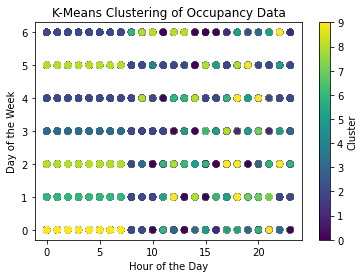

Decision Tree Rules:
 |--- Count <= 20.50
|   |--- class: 2
|--- Count >  20.50
|   |--- Count <= 61.50
|   |   |--- Count <= 21.50
|   |   |   |--- Hour <= 14.50
|   |   |   |   |--- class: 2
|   |   |   |--- Hour >  14.50
|   |   |   |   |--- class: 8
|   |   |--- Count >  21.50
|   |   |   |--- class: 8
|   |--- Count >  61.50
|   |   |--- Count <= 104.50
|   |   |   |--- class: 0
|   |   |--- Count >  104.50
|   |   |   |--- Count <= 150.50
|   |   |   |   |--- class: 6
|   |   |   |--- Count >  150.50
|   |   |   |   |--- Count <= 199.50
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Count >  199.50
|   |   |   |   |   |--- Count <= 254.50
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- Count >  254.50
|   |   |   |   |   |   |--- Count <= 316.50
|   |   |   |   |   |   |   |--- Count <= 315.50
|   |   |   |   |   |   |   |   |--- class: 9
|   |   |   |   |   |   |   |--- Count >  315.50
|   |   |   |   |   |   |   |   |--- Hour <= 20.50
|   |   |   |   |   

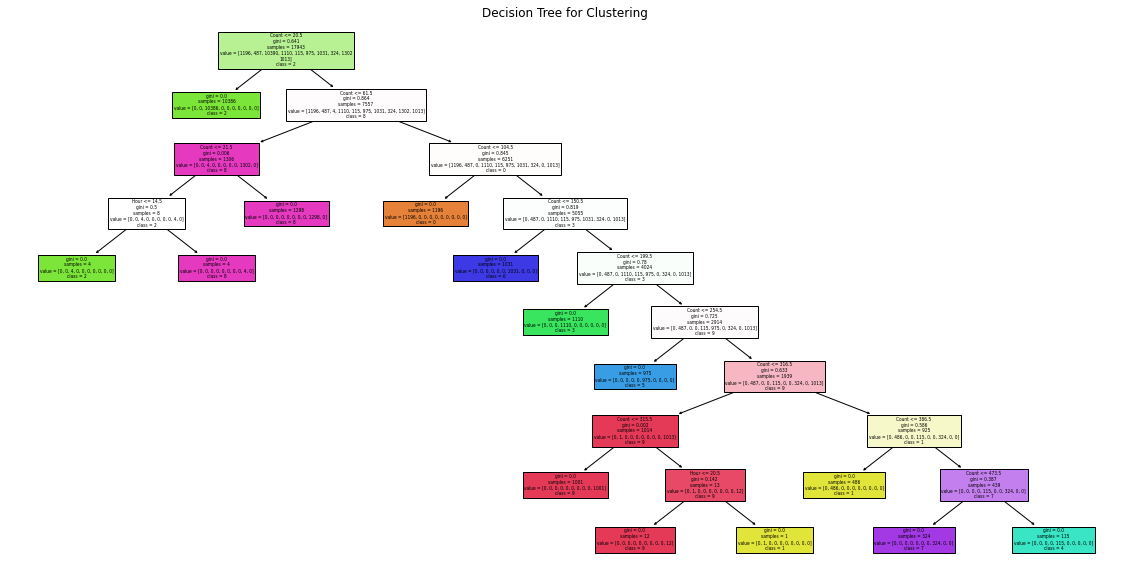

Extracted Borders:
Feature: Count, Threshold: 20.5
Feature: Count, Threshold: 61.5
Feature: Count, Threshold: 21.5
Feature: Hour, Threshold: 14.5
Feature: Count, Threshold: 104.5
Feature: Count, Threshold: 150.5
Feature: Count, Threshold: 199.5
Feature: Count, Threshold: 254.5
Feature: Count, Threshold: 316.5
Feature: Count, Threshold: 315.5
Feature: Hour, Threshold: 20.5
Feature: Count, Threshold: 386.5
Feature: Count, Threshold: 473.5
Silhouette Score:  0.6413930651373281
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1196
           1       1.00      1.00      1.00       487
           2       1.00      1.00      1.00     10390
           3       1.00      1.00      1.00      1110
           4       1.00      1.00      1.00       115
           5       1.00      1.00      1.00       975
           6       1.00      1.00      1.00      1031
           7       1.00      1.00      1.00       324
          

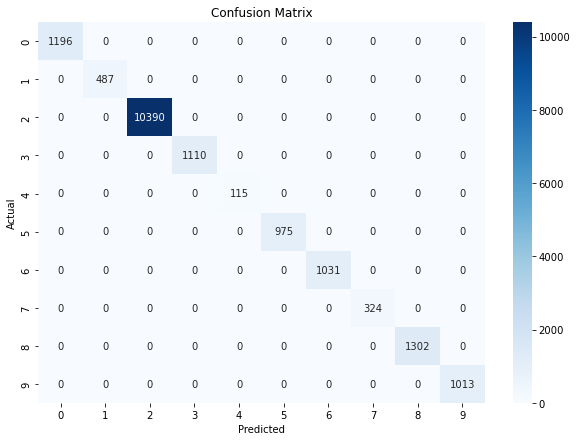

In [56]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the directory containing the Excel files
directory_path = 'Data_clean/Alta_sensors/'  

# Use glob to get all Excel files in the directory
excel_files = glob.glob(os.path.join(directory_path, '*.xlsx'))

# Print the list of found Excel files for verification
print("Found Excel files:", excel_files)

# Check if the list is empty and handle it appropriately
if not excel_files:
    raise ValueError("No Excel files found in the specified directory.")

# Load all files into a single DataFrame
data_frames = [pd.read_excel(file) for file in excel_files]
combined_data = pd.concat(data_frames, ignore_index=True)

# Print the column names to inspect them
print("Column names:", combined_data.columns)

# Convert the 'Date' column to datetime
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Sort by date
combined_data = combined_data.sort_values('Date')

# Set the Date column as the index
combined_data.set_index('Date', inplace=True)

# Check for missing values in 'Count' column
print("Missing values in 'Count' column before handling:", combined_data['Count'].isnull().sum())

# Handle missing values by filling with zero (or you could use combined_data.dropna(subset=['Count']))
combined_data['Count'] = combined_data['Count'].fillna(0)

# Verify there are no more missing values
print("Missing values in 'Count' column after handling:", combined_data['Count'].isnull().sum())

# Remove duplicate indices
combined_data = combined_data[~combined_data.index.duplicated(keep='first')]

# Resample data to 5-minute intervals and fill missing values with the previous value
combined_data = combined_data.resample('5T').ffill()

# Extract features from the 'Date' column
combined_data['Hour'] = combined_data.index.hour
combined_data['DayOfWeek'] = combined_data.index.dayofweek

# Select the features for clustering
features = combined_data[['Hour', 'DayOfWeek', 'Count']]

# Fill any remaining NaN values in the features DataFrame
features = features.fillna(0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
combined_data['Cluster'] = kmeans.fit_predict(features)

# Display the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Visualize the clusters
plt.scatter(combined_data['Hour'], combined_data['DayOfWeek'], c=combined_data['Cluster'], cmap='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('K-Means Clustering of Occupancy Data')
plt.colorbar(label='Cluster')
plt.show()

# Decision Tree for explainability
X = features
y = combined_data['Cluster']
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X, y)

tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

# Plot the decision tree to visually inspect the borders
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=list(X.columns), class_names=[str(i) for i in np.unique(y)], filled=True)
plt.title('Decision Tree for Clustering')
plt.show()

# Function to extract borders from the decision tree
def extract_borders(decision_tree, feature_names):
    tree = decision_tree.tree_
    feature = tree.feature
    threshold = tree.threshold
    
    borders = []
    for i in range(tree.node_count):
        if feature[i] != -2:  # -2 means the node is a leaf
            borders.append((feature_names[feature[i]], threshold[i]))
    
    return borders

# Extract and print the borders
borders = extract_borders(decision_tree, list(X.columns))
print("Extracted Borders:")
for feature, threshold in borders:
    print(f"Feature: {feature}, Threshold: {threshold}")

# Evaluate the clustering
silhouette_avg = silhouette_score(X, combined_data['Cluster'])
print("Silhouette Score: ", silhouette_avg)

y_pred = decision_tree.predict(X)
print("Classification Report:\n", classification_report(y, y_pred))

conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(10, 7))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
